当前工作目录: d:\berker\graduation_design\code\POMAPD\tests_nb
pardir ..
开始测试Map类...
成功加载配置文件: ..\config\environments\input_mid_poisson.yaml
地图初始化完成, 尺寸: 36x20
总面积: 720, 已知区域: 720
任务数量: 100
基地点数量: 30
创建部分已知地图，已知区域: 720
[Map] 生成了新的中心点！
前沿点数量: 22
中心点数量: 1

--- 任务测试 ---
时间点 5 的活跃任务数量: 0

--- 显示地图 ---
1. 显示完整地图


<Figure size 640x480 with 0 Axes>

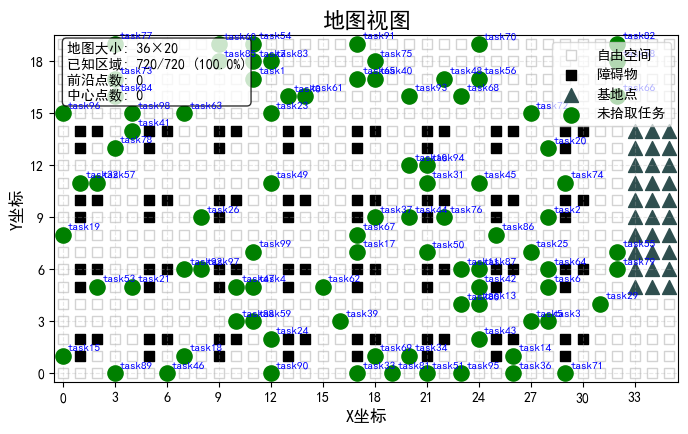

2. 显示部分已知地图（含前沿点和中心点）


<Figure size 640x480 with 0 Axes>

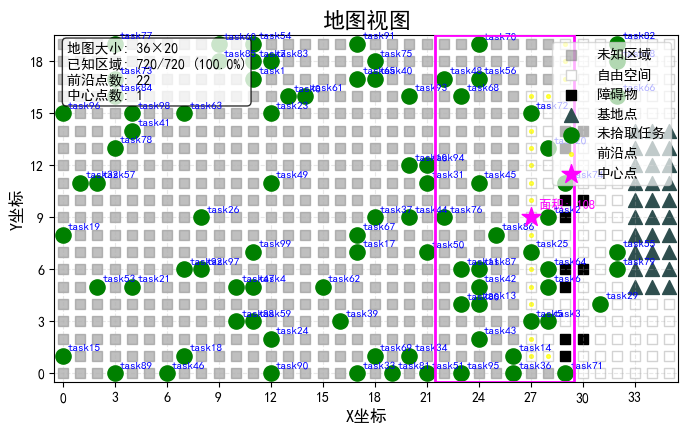

3. 显示部分已知地图（仅任务）


<Figure size 640x480 with 0 Axes>

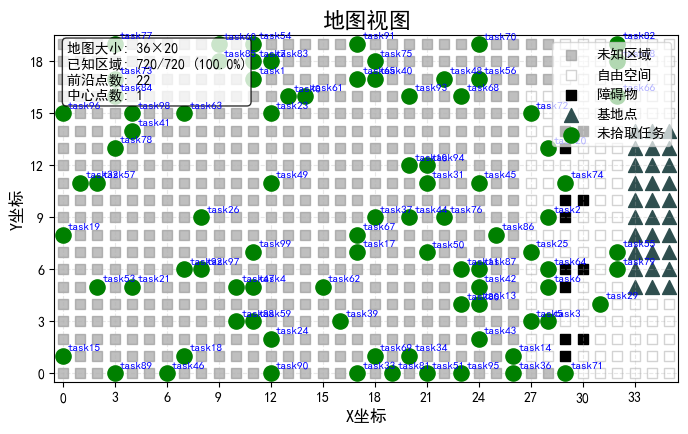

测试完成！


In [1]:
#!/usr/bin/env python3

import os
import sys
import yaml
import numpy as np
import matplotlib.pyplot as plt

print("当前工作目录:", os.getcwd())
print("pardir",os.pardir)
par_dir = os.pardir
sys.path.append(par_dir)

from src.map import Map, Centroid

def load_config(file_path):
    """
    加载YAML配置文件
    """
    with open(file_path, 'r') as f:
        config = yaml.load(f, Loader=yaml.FullLoader)
    return config

def main():
    """
    测试Map类的主函数
    """
    print("开始测试Map类...")
    
    # 加载配置
    config_path = os.path.join(par_dir, 'config', 'environments', 'input_mid_poisson.yaml')
    try:
        config = load_config(config_path)
        print(f"成功加载配置文件: {config_path}")
    except Exception as e:
        print(f"加载配置文件失败: {str(e)}")
        return
    
    # 创建地图实例
    map_info = config['map']
    tasks = config['tasks']
    agents = config['agents']
    laser_range = 5  # 假设激光范围为5
    
    # 初始化地图
    map_instance = Map(map_info, tasks, laser_range, screen=True)
    print(f"地图初始化完成, 尺寸: {map_instance.width}x{map_instance.height}")
    print(f"总面积: {map_instance.total_area}, 已知区域: {map_instance.known_area}")
    print(f"任务数量: {len(tasks)}")
    
    # 获取基地点
    base_positions = []
    for y in range(map_instance.height):
        for x in range(map_instance.width):
            if map_instance.map[y][x] == 2:  # 2表示基地点
                base_positions.append((x, y))
    print(f"基地点数量: {len(base_positions)}")
    
    # 创建一个部分已知的地图
    # 假设agent初始位置附近半径3的区域是已知的
    known_areas = []
    for agent in agents:
        x, y = agent['start']
        known_areas.append((max(0, x-3), max(0, y-3), 6, 6))  # 创建6x6的已知区域
    
    partial_map = map_instance.partial_unknown(known_areas)
    print(f"创建部分已知地图，已知区域: {partial_map.known_area}")
    
    # 获取前沿点和中心点
    partial_map.get_frontiers()
    partial_map.gen_centroids()
    print(f"前沿点数量: {len(partial_map.frontiers)}")
    print(f"中心点数量: {len(partial_map.centroids)}")

    # 测试任务查询
    print("\n--- 任务测试 ---")
    
    # 获取当前时间点可用的任务
    current_time = 5
    active_tasks = partial_map.get_all_active_tasks(current_time)
    print(f"时间点 {current_time} 的活跃任务数量: {len(active_tasks)}")
    
    if active_tasks:
        # 测试任务拾取
        task_name = list(active_tasks.keys())[0]
        task_pos = active_tasks[task_name]['start']
        x, y = task_pos
        task_info = partial_map.get_task_at_position(x, y)
        print(f"获取位置 ({x}, {y}) 的任务: {task_info['task_name'] if task_info else 'None'}")
        
        # 模拟任务拾取（手动更新状态）
        if task_info:
            print(f"拾取任务 {task_info['task_name']}")
            partial_map.task_map[y][x]['picked'] = True
    
    # 显示最终地图
    print("\n--- 显示地图 ---")
    print("1. 显示完整地图")
    map_instance.show(show_tasks=True, show_frontiers=False, show_centroids=False)
    
    print("2. 显示部分已知地图（含前沿点和中心点）")
    partial_map.show(show_tasks=True, show_frontiers=True, show_centroids=True)
    
    print("3. 显示部分已知地图（仅任务）")
    partial_map.show(show_tasks=True, show_frontiers=False, show_centroids=False)
    
    print("测试完成！")

if __name__ == "__main__":
    main()